In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import numpy as np

In [5]:
raw_metro = pd.read_csv('../data/Metro_Nashville_Police_Department_Incidents.csv')

In [6]:
print(raw_metro.shape)
raw_metro.head(5)

(892939, 31)


,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,7/1/2019 17:31,7/1/2019 18:17,2410 2410,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,3/31/2018 12:21,3/31/2018 19:41,5824 5824,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,4/6/2020 11:15,4/6/2020 13:11,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,5/29/2017 2:33,5/29/2017 4:27,1714 1714,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,12/16/2017 18:30,12/16/2017 22:44,1101 1101,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)


In [7]:
raw_metro['Incident Occurred'] = pd.to_datetime(raw_metro['Incident Occurred'])

In [8]:
filtered_metro = raw_metro[raw_metro['Incident Occurred'] >= '2020-01-01']

In [9]:
raw_metro.value_counts('Offense Description').head(20)

Offense Description
POLICE INQUIRY                               167672
BURGLARY- MOTOR VEHICLE                       64184
SIMPLE ASSLT                                  55845
DAMAGE PROP - PRIVATE                         45345
SHOPLIFTING                                   35919
LOST PROPERTY                                 28179
FOUND PROPERTY                                28155
ASSAULT- FEAR OF BODILY INJURY                27821
RECOVERY, STOLEN PROPERTY                     26776
WEAPON OFFENSE, CRIMINAL ATTEMPT              25769
LARC - FROM BLDG                              23627
VEHICLE THEFT                                 22936
DRUG PARAPHERNALIA- UNLAWFUL USE              22857
BURGLARY- AGGRAVATED                          19530
INTENTIONAL AGGRAVATED ASSAULT                18477
ASSAULT- OFFENSIVE OR PROVOCATIVE CONTACT     15200
ROBBERY                                       14619
TRANSPORT                                     13801
LARC - PARTS FROM VEH                       

In [10]:
raw_metro.value_counts('Zone').head(20)

Zone
313.0    15373
515.0    15370
211.0    14448
223.0    14286
715.0    13929
721.0    13358
621.0    13319
817.0    13170
321.0    13100
511.0    12998
613.0    12974
535.0    12805
221.0    12703
527.0    12636
727.0    12581
623.0    12388
111.0    12190
213.0    12189
815.0    12176
115.0    11977
dtype: int64

In [11]:
filtered_metro

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,2020-04-06 11:15:00,4/6/2020 13:11,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
6,20200019888_11,20200019888,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2020-01-09 15:35:00,1/9/2020 16:31,400 400,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,NON RESIDENT,POINT (-86.794 36.214)
12,20210244443_12,20210244443,S,SUSPECT,A,CLEARED BY ARREST,Closed,2021-05-02 01:30:00,5/5/2021 15:54,400 400,...,PERSONAL (HANDS),2,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.799 36.1)
13,20200298561_11,20200298561,D,DISPATCHED,O,OPEN,Open,2020-04-27 10:30:00,4/27/2020 15:16,AIRPARK DR,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.7 36.19)
14,20210168072_11,20210168072,T,NaN,U,UNFOUNDED,Closed,2021-03-23 15:00:00,3/24/2021 11:55,806 806,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.59 36.175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892934,20220559925_11,20220559925,D,DISPATCHED,O,OPEN,Open,2022-11-06 02:00:00,11/6/2022 5:10,MARGO,...,HANDGUN,1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.7 36.08)
892935,20220657438_11,20220657438,D,DISPATCHED,U,UNFOUNDED,Closed,2022-12-28 12:20:00,12/28/2022 13:35,107 107,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.724 36.267)
892936,20220657558_11,20220657558,T,NaN,O,OPEN,Open,2022-12-22 12:00:00,12/28/2022 14:09,HAYWOOD LN,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.69 36.07)
892937,20220551034_11,20220551034,D,DISPATCHED,O,OPEN,Open,2022-11-01 13:00:00,11/1/2022 16:21,MUSIC CITY CIR,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.7 36.22)


In [12]:
filtered_metro.head(5)

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,2020-04-06 11:15:00,4/6/2020 13:11,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)
6,20200019888_11,20200019888,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2020-01-09 15:35:00,1/9/2020 16:31,400 400,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,NON RESIDENT,POINT (-86.794 36.214)
12,20210244443_12,20210244443,S,SUSPECT,A,CLEARED BY ARREST,Closed,2021-05-02 01:30:00,5/5/2021 15:54,400 400,...,PERSONAL (HANDS),2,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.799 36.1)
13,20200298561_11,20200298561,D,DISPATCHED,O,OPEN,Open,2020-04-27 10:30:00,4/27/2020 15:16,AIRPARK DR,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.7 36.19)
14,20210168072_11,20210168072,T,NaN,U,UNFOUNDED,Closed,2021-03-23 15:00:00,3/24/2021 11:55,806 806,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.59 36.175)


In [13]:
filtered_metro.value_counts('Offense Description').head(10)

Offense Description
POLICE INQUIRY                      75013
BURGLARY- MOTOR VEHICLE             33202
SIMPLE ASSLT                        24550
DAMAGE PROP - PRIVATE               20242
FOUND PROPERTY                      14303
SHOPLIFTING                         14123
LOST PROPERTY                       13660
ASSAULT- FEAR OF BODILY INJURY      13281
WEAPON OFFENSE, CRIMINAL ATTEMPT    12626
RECOVERY, STOLEN PROPERTY           12554
dtype: int64

In [14]:
filtered_metro.value_counts('Zone').head(10)

Zone
515.0    5242
223.0    5147
313.0    5071
817.0    4784
715.0    4625
815.0    4458
211.0    4431
535.0    4373
613.0    4366
811.0    4354
dtype: int64

In [16]:
early_metro = raw_metro[(raw_metro['Incident Occurred'] >= '2016-01-01') & (raw_metro['Incident Occurred'] < '2020-01-01')]

In [17]:
early_metro

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,2019-07-01 17:31:00,7/1/2019 18:17,2410 2410,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-03-31 12:21:00,3/31/2018 19:41,5824 5824,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,2017-05-29 02:33:00,5/29/2017 4:27,1714 1714,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086)
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2017-12-16 18:30:00,12/16/2017 22:44,1101 1101,...,PERSONAL (HANDS),1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178)
5,20190792147_11,20190792147,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2019-10-28 12:00:00,10/30/2019 20:10,506 506,...,PERSONAL (HANDS),1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.779 36.17)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892417,20160197432_11,20160197432,S,SUSPECT,R,REFUSED TO COOPERATE,Closed,2016-01-01 00:00:00,2/29/2016 18:00,STEWARTS FERRY PIKE,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,POINT (-86.65 36.16)
892550,20190532497_11,20190532497,D,DISPATCHED,U,UNFOUNDED,Closed,2019-07-16 20:18:00,7/16/2019 20:52,2942 2942,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Hispanic,RESIDENT,POINT (-86.625 36.074)
892584,20160552452_11,20160552452,O,NaN,P,PROSECUTION DECLINED,Closed,2016-01-01 00:00:00,6/20/2016 13:10,PEARL ST,...,NONE,1,False,S,SOCIETY,NaN,NaN,NaN,NaN,POINT (-86.8 36.16)
892664,20180821692_11,20180821692,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-09-26 21:45:00,9/26/2018 22:19,850 850,...,HANDGUN,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.879 36.138)


In [18]:
early_metro.value_counts('Offense Description').head(10)

Offense Description
POLICE INQUIRY                      92659
SIMPLE ASSLT                        31295
BURGLARY- MOTOR VEHICLE             30982
DAMAGE PROP - PRIVATE               25103
SHOPLIFTING                         21796
DRUG PARAPHERNALIA- UNLAWFUL USE    17290
ASSAULT- FEAR OF BODILY INJURY      14540
LOST PROPERTY                       14519
LARC - FROM BLDG                    14301
RECOVERY, STOLEN PROPERTY           14222
dtype: int64

In [19]:
early_metro.value_counts('Zone').head(10)

Zone
313.0    10302
515.0    10128
211.0    10017
621.0     9442
715.0     9304
223.0     9139
721.0     9008
321.0     8898
511.0     8858
527.0     8682
dtype: int64

In [20]:
target_metro = raw_metro[raw_metro['Incident Occurred'] >= '2016-01-01']

In [21]:
target_metro.value_counts('Zone').head(20)

Zone
313.0    15373
515.0    15370
211.0    14448
223.0    14286
715.0    13929
721.0    13358
621.0    13319
817.0    13170
321.0    13100
511.0    12998
613.0    12974
535.0    12805
221.0    12703
527.0    12636
727.0    12581
623.0    12388
111.0    12190
213.0    12189
815.0    12176
115.0    11977
dtype: int64

In [22]:
target_metro.value_counts('Offense Description').head(20)

Offense Description
POLICE INQUIRY                               167672
BURGLARY- MOTOR VEHICLE                       64184
SIMPLE ASSLT                                  55845
DAMAGE PROP - PRIVATE                         45345
SHOPLIFTING                                   35919
LOST PROPERTY                                 28179
FOUND PROPERTY                                28155
ASSAULT- FEAR OF BODILY INJURY                27821
RECOVERY, STOLEN PROPERTY                     26776
WEAPON OFFENSE, CRIMINAL ATTEMPT              25769
LARC - FROM BLDG                              23627
VEHICLE THEFT                                 22936
DRUG PARAPHERNALIA- UNLAWFUL USE              22857
BURGLARY- AGGRAVATED                          19530
INTENTIONAL AGGRAVATED ASSAULT                18477
ASSAULT- OFFENSIVE OR PROVOCATIVE CONTACT     15200
ROBBERY                                       14619
TRANSPORT                                     13801
LARC - PARTS FROM VEH                       

In [23]:
top10_crimes=target_metro.value_counts('Offense Description').head(10)
top10_crimes

Offense Description
POLICE INQUIRY                      167672
BURGLARY- MOTOR VEHICLE              64184
SIMPLE ASSLT                         55845
DAMAGE PROP - PRIVATE                45345
SHOPLIFTING                          35919
LOST PROPERTY                        28179
FOUND PROPERTY                       28155
ASSAULT- FEAR OF BODILY INJURY       27821
RECOVERY, STOLEN PROPERTY            26776
WEAPON OFFENSE, CRIMINAL ATTEMPT     25769
dtype: int64

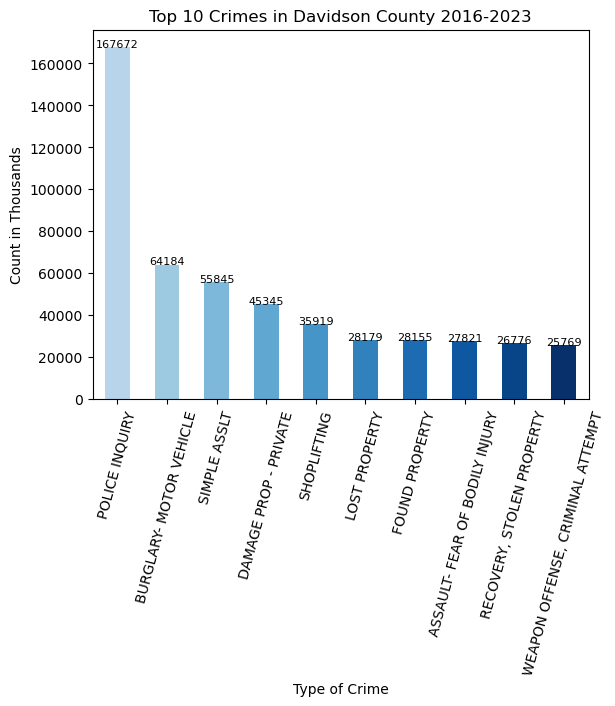

In [24]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
top10_crimes.plot(kind='bar',color=blues)

plt.title('Top 10 Crimes in Davidson County 2016-2023')
plt.xlabel('Type of Crime')
plt.ylabel('Count in Thousands')
for index,data in enumerate(top10_crimes):
    plt.annotate(f"{data}", xy=(index,data), ha='center', fontsize=8)
    
plt.xticks(rotation=75)
plt.show()

In [25]:
top_10zone=target_metro.value_counts('Zone').head(10)
top_10zone

Zone
313.0    15373
515.0    15370
211.0    14448
223.0    14286
715.0    13929
721.0    13358
621.0    13319
817.0    13170
321.0    13100
511.0    12998
dtype: int64

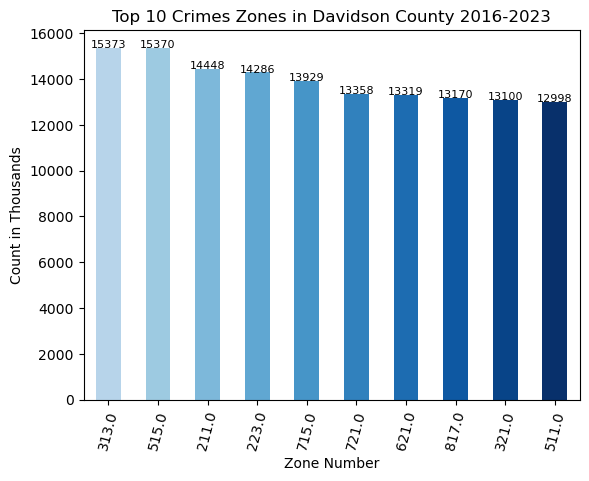

In [26]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
top_10zone.plot(kind='bar', color = blues)

plt.title('Top 10 Crimes Zones in Davidson County 2016-2023')
plt.xlabel('Zone Number')
plt.ylabel('Count in Thousands')
for index,data in enumerate(top_10zone):
    plt.annotate(f"{data}", xy=(index,data), ha='center', fontsize=8)
    
plt.xticks(rotation=75)
plt.show()

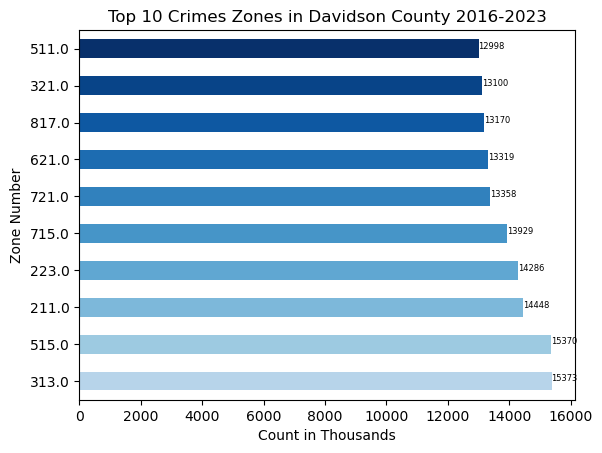

In [27]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
top_10zone.plot(kind='barh', color = blues)

plt.title('Top 10 Crimes Zones in Davidson County 2016-2023')
plt.xlabel('Count in Thousands')
plt.ylabel('Zone Number')
for index,data in enumerate(top_10zone):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=6)

plt.yticks(rotation=0)
plt.show()

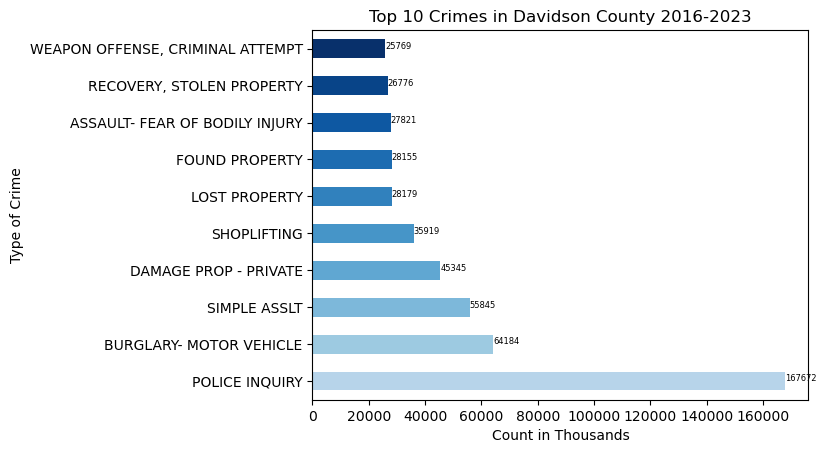

In [28]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
top10_crimes.plot(kind='barh', color = blues)

plt.title('Top 10 Crimes in Davidson County 2016-2023')
plt.xlabel('Count in Thousands')
plt.ylabel('Type of Crime')
for index,data in enumerate(top10_crimes):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=6)

plt.yticks(rotation=0)
plt.show()

In [29]:

raw_metro['Year'] = raw_metro['Incident Occurred'].dt.year
crime_by_year = raw_metro['Year'].value_counts()
print(crime_by_year)

2018    124564
2017    123520
2016    121909
2022    119911
2019    119604
2020    118090
2021    115823
2023     49518
Name: Year, dtype: int64


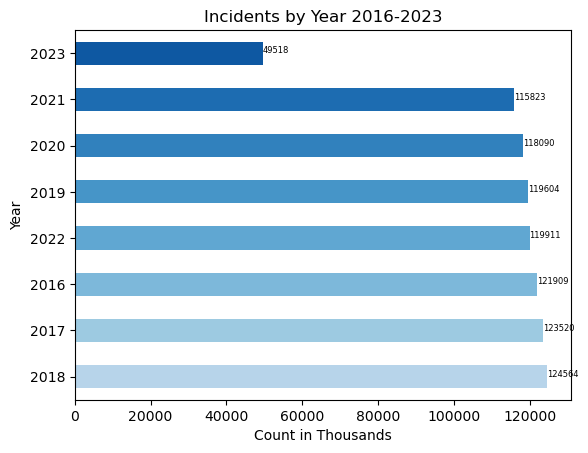

In [30]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
crime_by_year.plot(kind='barh', color = blues)

plt.title('Incidents by Year 2016-2023')
plt.xlabel('Count in Thousands')
plt.ylabel('Year')
for index,data in enumerate(crime_by_year):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=6)

plt.yticks(rotation=0)
plt.show()

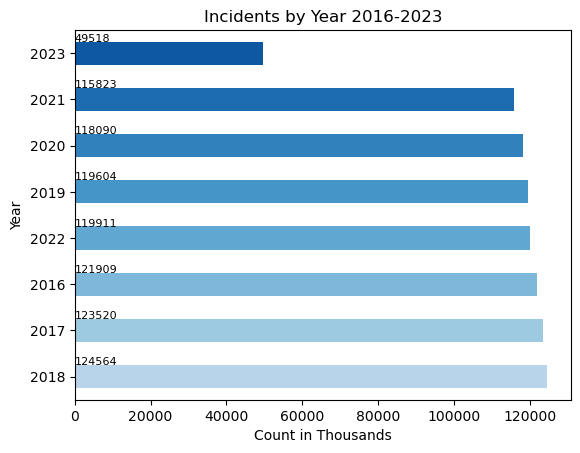

In [31]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
crime_by_year.plot(kind='barh', color = blues)

plt.title('Incidents by Year 2016-2023')
plt.xlabel('Count in Thousands')
plt.ylabel('Year')
for index,data in enumerate(crime_by_year):
    plt.annotate(f"{data}", xy=(data,index), xytext=(5, index+0.25), ha='left', fontsize=8)

plt.yticks(rotation=0)
plt.show()

In [32]:
crime10_zip=raw_metro['ZIP Code'].value_counts().head(10)
crime10_zip

37207.0    49997
37211.0    44391
37013.0    43495
37115.0    40067
37203.0    28365
37208.0    28057
37210.0    27100
37206.0    24893
37209.0    24578
37217.0    24038
Name: ZIP Code, dtype: int64

In [33]:
zip10=crime10_zip.astype(int)
zip10

37207.0    49997
37211.0    44391
37013.0    43495
37115.0    40067
37203.0    28365
37208.0    28057
37210.0    27100
37206.0    24893
37209.0    24578
37217.0    24038
Name: ZIP Code, dtype: int32

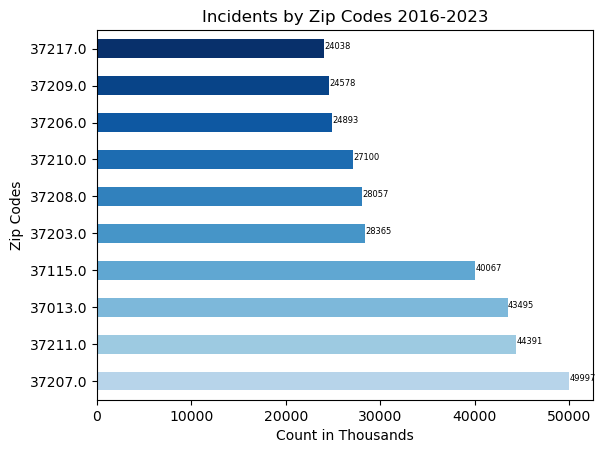

In [83]:
blues = plt.cm.Blues(np.linspace(0.3, 1, 10))
crime10_zip.plot(kind='barh', color = blues)

plt.title('Incidents by Zip Codes 2016-2023')
plt.xlabel('Count in Thousands')
plt.ylabel('Zip Codes')
for index,data in enumerate(crime10_zip):
    plt.annotate(f"{data}", xy=(data,index), ha='left', fontsize=6)

plt.yticks(rotation=0)
plt.show()

In [34]:
raw_metro.head(10)

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location,Year
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,2019-07-01 17:31:00,7/1/2019 18:17,2410 2410,...,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218),2019
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2018-03-31 12:21:00,3/31/2018 19:41,5824 5824,...,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042),2018
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,2020-04-06 11:15:00,4/6/2020 13:11,3144 3144,...,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232),2020
3,20170471747_11,20170471747,D,DISPATCHED,U,UNFOUNDED,Closed,2017-05-29 02:33:00,5/29/2017 4:27,1714 1714,...,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.907 36.086),2017
4,20171099391_21,20171099391,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2017-12-16 18:30:00,12/16/2017 22:44,1101 1101,...,1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.586 36.178),2017
5,20190792147_11,20190792147,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2019-10-28 12:00:00,10/30/2019 20:10,506 506,...,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.779 36.17),2019
6,20200019888_11,20200019888,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2020-01-09 15:35:00,1/9/2020 16:31,400 400,...,1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,NON RESIDENT,POINT (-86.794 36.214),2020
7,20170069535_11,20170069535,D,DISPATCHED,U,UNFOUNDED,Closed,2017-01-22 09:00:00,1/23/2017 15:21,1700 1700,...,1,False,U,UNKNOWN,U,U,Unknown,NaN,POINT (-86.8 36.18),2017
8,20170051465_11,20170051465,D,DISPATCHED,U,UNFOUNDED,Closed,2017-01-17 12:00:00,1/17/2017 21:17,124 124,...,1,False,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,POINT (-86.665 36.06),2017
9,20200532326_11,20200532326,T,NaN,O,OPEN,Open,2019-12-15 15:00:00,8/18/2020 9:34,HILLSBORO PIKE,...,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.82 36.1),2019


In [ ]:
year_zp